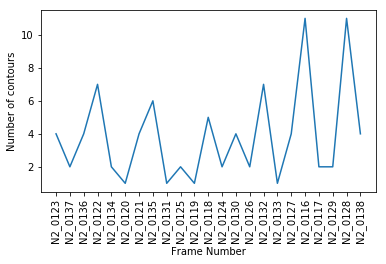

In [30]:
from skimage.measure import compare_ssim
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2
import os

desktop = '/Users/frodo/Desktop/'
normal_data_path = '/Users/frodo/Documents/placement/data/fireworks/normal/'
abnormal_data_path = '/Users/frodo/Documents/placement/data/fireworks/abnormal/'

dir_to_scan = abnormal_data_path
# dir_to_scan = normal_data_path

normal_data = []
abnormal_data = []

mean_img = cv2.imread(dir_to_scan + '../../night/mean.png')
mean_img_gray = cv2.cvtColor(mean_img, cv2.COLOR_BGR2GRAY)

for image in os.listdir(normal_data_path):
    normal_data.append(image)
for image in os.listdir(abnormal_data_path):
    abnormal_data.append(image)
    
frame_numbers = []
n_contours = []
areas_contours = []

for image in os.listdir(dir_to_scan):
    image2compare = cv2.imread(dir_to_scan + image)
    image2compare_gray = cv2.cvtColor(image2compare, cv2.COLOR_BGR2GRAY)
    n_frame = image.strip('.png')    
    frame_numbers.append(n_frame)
    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(mean_img_gray, image2compare_gray, full=True)
    diff = (diff * 255).astype("uint8")
    ret,threshold_image = cv2.threshold(diff,127,255, cv2.THRESH_BINARY_INV)    
    cnts = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    n_contours.append(int(len(cnts[0]))) if imutils.is_cv2() else n_contours.append(int(len(cnts[1])))
    
    for c in cnts:
        # compute the bounding box of the contour and then draw the
        # bounding box on both input images to represent where the two
        # images differ
        (x, y, w, h) = cv2.boundingRect(c)
        area = cv2.contourArea(c)
        areas_contours.append(area)

plt.figure('N_{contours}(# frame) ')
plt.xticks(rotation=90, fontsize=10)
plt.plot(frame_numbers, n_contours)

plt.xlabel('Frame Number')
plt.ylabel('Number of contours')
plt.gcf().subplots_adjust(bottom=0.25)
if dir_to_scan == abnormal_data_path: 
    plt.savefig(desktop + 'ncont_of_nframe_abnormal.png')
    plt.show()
else:
    plt.xticks(rotation=90, fontsize=3)
    plt.savefig(desktop + 'ncont_of_nframe_normal.png')
